## Introduction to Probabilistic Graphical Models: Practical session 2 - Gaussian Mixture Models 

## EM for GMMs

### Question 1
In Gaussian Mixture Models, we often need to evaluate quantities that are defined as follows:

$$
\gamma_i(x)=\frac{\pi_i \mathcal{N}(x;\mu_i,\Sigma_i ) }{\sum_{j=1}^{K}\pi_j \mathcal{N}(x;\mu_j,\Sigma_j)}
 $$
 
where $\pi_i \in [0,1]$ and $\mathcal{N}$ denotes the multivariate Gaussian distribution.  A direct computation of these quantities mightbe problematic in practice since all the terms ($\pi_i\mathcal{N}(x;\mu_i,\Sigma_i )$) might be very small, and we might end up with 0/0.

Derive mathematically (don’t try to take the derivative!)  and implement a function for numerically stable computation of $\begin{Bmatrix}
\gamma_i
\end{Bmatrix}_{i=1}^k$.

Hint:  first compute $\ell_i= log\pi_i \mathcal{N}(x;\mu_i,\Sigma_i )$ in a numerically stable way (be careful when computing $log det\Sigma_i$).  Then use a trick similar to the one we used for ‘log_sum_exp’.


#### 1.Efficiently compute $\gamma_i(x)$
 A direct computation  $\gamma_i(x)=\frac{\pi_i \mathcal{N}(x;\mu_i,\Sigma_i ) }{\sum_{j=1}^{K}\pi_j \mathcal{N}(x;\mu_j,\Sigma_j)}$ mightbe problematic in practice since all the terms ($\pi_i\mathcal{N}(x;\mu_i,\Sigma_i )$) might be very small, and we might end up with 0/0.


In order to avoid this, we will use the $\textbf{logsum}$ trick.

First we compute :

$$\ell_i = log\left(\pi_i\mathcal{N}\left(x, \mu_i, \Sigma_i\right)\right) 
= log(\pi_i) -\frac{N}{2}log(2\pi) - \frac{1}{2}log(|\Sigma_i|) - (x - \mu_i)^T\Sigma_i^{-1}(x - \mu_i) \quad \quad \forall  1 \leq  i \leq K $$ 

Then we compute 
$$log(\gamma_i(x)) = \ell_i - log(\sum_{i=1}^K{e^{\ell_j}}) = \ell_i - a - log(\sum_{i=1}^K{e^{\ell_j - a}}) \quad \text{with a=$\max_{1 \leq  i \leq K } \ell_i$} $$

By subtrcting the larget value , the largest value passed to the exponential function is 0. If there are really tiny values after subtraction, they’ll become zero and drop out, as they should with limited precision arithmetic.This way, we will have a stable computation for very small values.

### Question 2

Let us consider a Gaussian Mixture Model (GMM), given as follows :
$$
p(x_n) = \sum_{k=1}^{K}{\pi_i\mathcal{N}\left(x_n, \mu_i, \Sigma_i\right)}
$$

where $\begin{Bmatrix}
x_n
\end{Bmatrix}_{n=1}^N$ is a set of observed data points and $\mathcal{N}\left(x, \mu_i, \Sigma_i\right)$ designates the density function of a multivariate gaussian law with mean $\mu_i$ and covariance matrix $\Sigma_i$ evaluated at point $x$.   

$$\mathcal{N}\left(x, \mu_i, \Sigma_i\right) = \frac{1}{\sqrt{(2\pi)^D|\boldsymbol\Sigma_i|}}
e^{-\frac{1}{2}({x}-{\mu_i})^T{\boldsymbol\Sigma_i}^{-1}({x}-{\mu_i})}$$ 

Derive the M-Step of the Expectation-Maximization algorithm for this model, to find $\pi^{(t+1)}_{1:K},\mu^{(t+1)}_{1:K},\Sigma^{(t+1)}_{1:K}$, where t denotes the iteration number.


#### 2.1 EM algorithms

We want to find the set $\{( \pi_k, \mu_k, \Sigma_k)\}_{k \in [0, K-1]}$ such that :

 $$\{( \pi_k, \mu_k, \Sigma_k)\}_{1 \leq k \leq K} = \underset{\{( \pi_k, \mu_k, \Sigma_k)\}}{\text{argmax}}J(x_{1:n}) = p(x_{1:n} |  \pi_k, \mu_k, \Sigma_k) $$
 
To solve this task we will take advantage of Expectation Maximization Algorithms  an iterative method to find maximum likelihood  estimates of parameters.

The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step. 

The EM algorithm seeks to find the MLE of the marginal likelihood by iteratively applying these two steps :

 E-step: Define $Q ( \theta ∣ \theta^t  )$ as the expected value of the log likelihood function of $\theta$  with respect to the current conditional distribution of Z given X  and the current estimates of the parameters $\theta^t$ : 
 $$Q ( \theta ∣ \theta^t  )=\mathbb{E}_{Z|X,\theta^t}[log(L(\theta_t,X,Z))]$$

 
M-step: Find the parameters that maximize this quantity:

$\theta_{t} = \underset{\theta}{\text{argmax}} \; Q ( \theta ∣ \theta^t  )$

### References:

1. [Expectation–maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)
    


#####   E-step


$$L(\theta_t,X,Z) = \prod_{n=1}^{N}{\mathbb{P}(x_n | z_n, \theta)\mathbb{P}(z_n | \theta)}$$

$$\mathbb{P}(x_n | \theta, z_n) = \prod_{k=1}^{K}{{\mathcal{N}\left(x_n, \mu_k, \Sigma_k\right)}^{\mathbb{1}_{z_n=k}}}$$
$$ p(z_n | \theta) = \prod_{k=1}^{K}{{\pi_k}^{\mathbb{1}_{z_n=k}}} $$


$
\begin{equation}\begin{split}
Q ( \theta ∣ \theta^t  )
&= \mathbb{E}_{Z|X,\theta^t}[log(L(\theta_t,X,Z)) ] \\
&= \mathbb{E}_{Z|X,\theta^t}[\sum_{n=1}^{N}{ln(\prod_{k=1}^{K}{{\mathcal{N}(x_n, \mu_k, \Sigma_k)}^{\mathbb{1}_{z_n=k}}})} + \sum_{n=1}^{N}{ln(\prod_{k=1}^{K}{{\pi_k}^{\mathbb{1}_{z_n}(k)}})}] \\
&= \mathbb{E}_{Z|X,\theta^t}[\sum_{n=1}^{N}{\sum_{k=1}^{K}{\mathbb{1}_{z_n=k} (ln({\mathcal{N} (x_n, \mu_k, \Sigma_k)}) + ln({\pi_k}) )}} ] \\
&= \sum_{n=1}^{N}{\sum_{k=1}^{K}{\mathbb{E}_{Z|X,\theta^t}[\mathbb{1}_{z_n=k}] (ln({\mathcal{N} (x_n, \mu_k, \Sigma_k)}) +ln({\pi_k}))}}  \\
\end{split}\end{equation}$





Let us denote $\mathbb{E}_{Z|X,\theta^t}[\mathbb{1}_{z_n=k}]=p(z_n=k | x_n, \theta^t) = \gamma_{k, n}$.Using  Bayes theorem we have the following :

$$\gamma_{k, n} = \frac{p(x_n | z_n=k, \theta^t)p(z_n=k | \theta^t)}{p(x_n | \theta^t)}=\frac{\pi_k\mathcal{N}\left(x_n, \mu_k, \Sigma_k\right)}{\sum_{k=1}^{K}{\pi_k\mathcal{N}\left(x_n, \mu_k, \Sigma_k\right)}}$$.


Plug in this expression  in $Q ( \theta ∣ \theta^t  )$ formula we  end up with:
$$Q ( \theta ∣ \theta^t  ) = \sum_{n=1}^{N}{\sum_{k=1}^{K}{\gamma_{k, n}(ln({\mathcal{N} (x_n, \mu_k, \Sigma_k)}) +ln({\pi_k}))}}$$

##### M-step
$Q ( \theta ∣ \theta^t  )$ being quadratic in form means that determining the maximizing values of θ is relatively straightforward.

If you solve it to find the  $\underset{\theta}{\text{argmax}} \; Q ( \theta ∣ \theta^t  )$ under the constraint that $\forall k, w_k \geq 0$ and $\sum_{k=1} ^K {w_k}=1$ , you will find the following :

- $w_k^{t+1} = \frac{1}{N} \sum_{n=1}^{N}{\gamma_{k, n}^t}$
- $\mu_k^{t+1} = \frac{ \sum_{n=1}^{N}{\gamma_{k, n}^t x_n} }{\sum_{n=1}^{N}{\gamma_{k, n}^t}}$
- $\Sigma_k^{t+1} = \frac{ \sum_{n=1}^{N}{\gamma_{k, n}^t (x_n - \mu_k^t)^T(x_n - \mu_k^t)} }{\sum_{n=1}^{N}{\gamma_{k, n}^t}}$

### Question 3

Consider the model given in Equation 1.  Set :

K= 3

$w_1 = 0.3\quad \mu_1=(0,0)\quad \Sigma_1 = (1.00, −0.25; −0.25, 0.50)$

$w_2 = 0.2\quad \mu_2=(1,2)\quad \Sigma_2 = (0.50, 0.25; 0.25, 0.50)$

$w_3 = 0.5\quad \mu_3=(2,0)\quad \Sigma_3 = (0.50, −0.25; −0.25, 1)$


1.  Generate a dataset $\begin{Bmatrix}
x_n
\end{Bmatrix}_{n=1}^N$. by using the model definition (set N= 1000).  Visualize the dataset.

Text(0.5, 1.0, 'Sample From The Gaussian Mixture Model ')

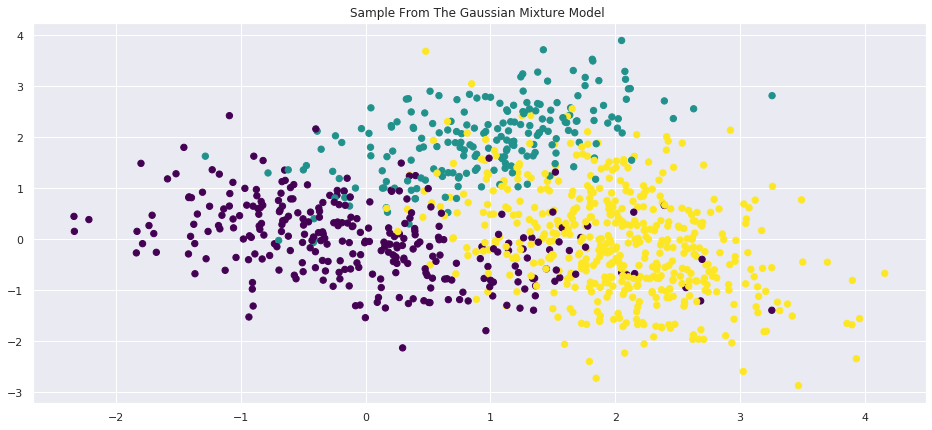

In [34]:
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

N=1000
K=3

w = np.array([0.3, 0.2, 0.5])
μ = np.array([ [0, 0], [1, 2], [2, 0] ])
Σ = np.array([[[1., -.25], [-.25, .5]],[[.5, .25], [.25, .5]],[[.5, -.25], [-.25, 1.]]])

y =[np.random.choice(K, p=w)  for i in range(N)] 
X=np.array([np.random.multivariate_normal(μ[u], Σ[u])  for u in y ]).reshape(-1,2) 

plt.figure(figsize=(16,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.title("Sample From The Gaussian Mixture Model ")


2.  Implement the EM algorithm for GMMs (be careful about numerical stability !)

In [0]:
import numpy as np

def log_li(w, x, μ, Σ):
    x_norm = x - μ
    inv_Σ = np.linalg.inv(Σ)
    _, log_det_Σ = np.linalg.slogdet(Σ) 
    n = Σ.shape[0]
    return np.log(w) - n/2.*np.log(2*np.pi) - log_det_Σ/2. - np.dot(x_norm.T, np.dot(inv_Σ, x_norm))

def log_γ(x, w_array, μ_array, Σ_array):
    K = w_array.shape[0]
    l_array = np.array([log_li(w, x, μ, Σ) for (w, μ, Σ) in zip(w_array, μ_array, Σ_array)])
    l_max = np.max(l_array)
    return l_array - l_max + np.log(np.exp(l_array - l_max).sum())

def log_likelihood(X, w_array, μ_array, Σ_array):
    s = 0
    for x in X:
        l_array = np.array([log_li(w, x, μ, Σ) for (w, μ, Σ) in zip(w_array, μ_array, Σ_array)])
        l_max = np.max(l_array)
        s += l_max + np.log(np.exp(l_array - l_max).sum())
    return s

def γ_matrix(X, w, μ, Σ):
    return  np.array([np.exp(log_γ(x, w, μ, Σ)) for x in X]).T
def EM_step(X, w, μ, Σ):
 
    N, D = X.shape 
    K = w.shape[0]
    
    w_ = np.zeros(K)
    μ_ = np.zeros((K, D))
    Σ_ = np.zeros((K, D, D))
    
    γ = γ_matrix(X, w, μ, Σ)
    γ_sum = γ.sum(axis=1)
   
    w_ = γ_sum / γ_sum.sum()

    for i in range(K):
        γ_k = γ[i, :].reshape(-1,1)
        μ_[i] = (γ_k * X).sum(axis=0) / γ_k.sum()
        centered_X = X - μ_[i]
        Σ_[i] = (centered_X.T).dot(centered_X*γ_k) / γ_sum[i]
    
    return w_, μ_, Σ_

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))

def GMM(X,n_step, w, μ, Σ):
    likelihood = []
    for step in range(n_step):
        w, μ, Σ = EM_step(X, w, μ, Σ)
        likelihood.append(log_likelihood(X, w, μ, Σ))    
    γ = γ_matrix(X, w, μ, Σ)  
    return w, μ, Σ,γ.argmax(axis=0), np.array(likelihood)


(a)  Forget about the true parameters $\pi_{1:K}$,$\mu_{1:K}$, and $\Sigma_{1:K}$ for now.  By only considering the dataset $\begin{Bmatrix}
x_n
\end{Bmatrix}_{n=1}^N$ that  is  generated  in  the  previous  step,  run  the  EM  algorithm  after  randomly  initializing  the  parameterestimates $\pi_{1:K}^{(0)}$,$\mu_{1:K}^{(0)}$, and $\Sigma_{1:K}^{(0)}$. Visualize the intermediate results by plotting the contours of the estimated Gaussians.

In GMM, the choice of the points initializing the algorithm is really important,We can perform first the K-means algorithm, and use the centers centers to initialize the means of the gaussians, and the variance of each cluster to initialize the covariance matrixes.

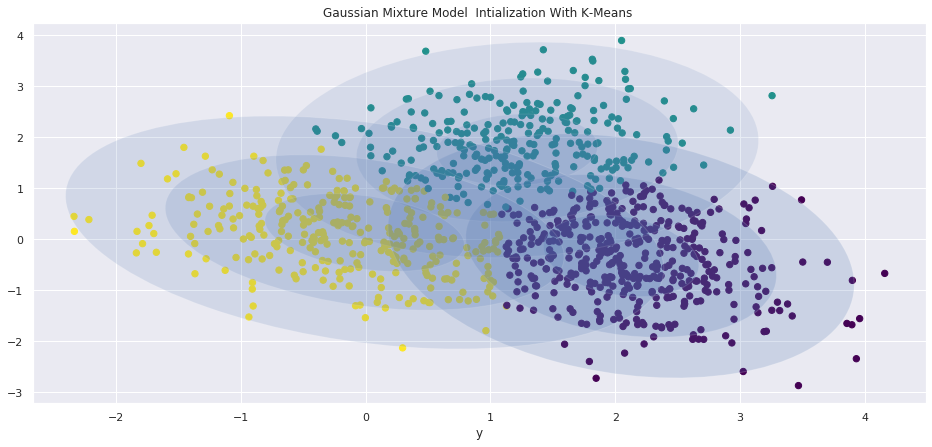

In [37]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels=kmeans.labels_
μ_init=kmeans.cluster_centers_

Σ_init=[np.cov(X[labels==u],rowvar=0) for u in range(3)]

w_init=np.array([0.33333333, 0.33333333, 0.33333333])

w_pred, μ_pred, Σ_pred, labels_predicted,log_likelihood_hist = GMM(X,40,w_init, μ_init, Σ_init)

plt.figure(figsize=(16,7))
plt.scatter(X[:, 0], X[:, 1], c=labels_predicted, s=40, cmap='viridis')
plt.xlabel("x")
plt.xlabel("y")
plt.title("Gaussian Mixture Model  Intialization With K-Means ")

w_factor = 0.2 / w_pred.max()
for pos, covar, w in zip(μ_pred, Σ_pred, w_pred):
   draw_ellipse(pos, covar, alpha=w * w_factor)



(b)  While  running  the  EM  algorithm,  compute  the  log-likelihood.   Plot  the  log-likelihood  vs  iterations  (becareful about numerical stability!).

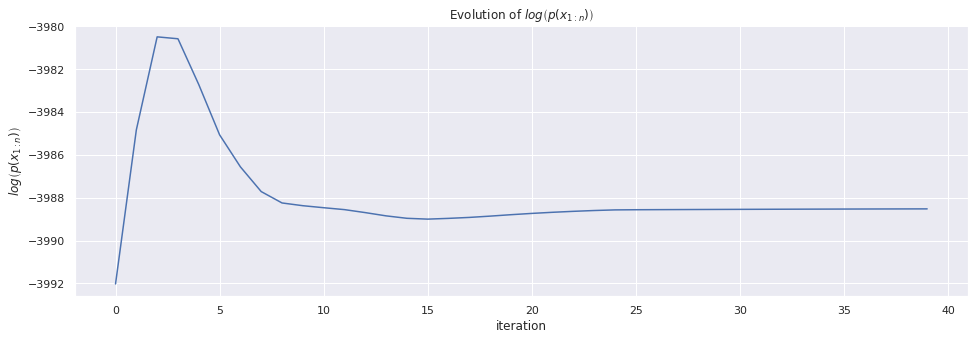

In [38]:
plt.figure(figsize=(16,5))
plt.plot(log_likelihood_hist)
plt.title(r"Evolution of $log\left(p(x_{1:n})\right)$")
plt.xlabel("iteration")
plt.ylabel(r"$log\left(p(x_{1:n})\right)$")
plt.show()

(c)  Run the EM algorithm with different initializations for $\pi_{1:K}^{(0)}$,$\mu_{1:K}^{(0)}$, and $\Sigma_{1:K}^{(0)}$.  How sensitive is the algorithmfor different initial values?

In [0]:
def Random_init(X, K=3):
    (N, D) = X.shape
  
    random_points_indexes = np.random.choice(N, size=K, replace=False)
    μ_array = X[random_points_indexes]
    w_array = np.ones(K) / float(K)

    Σ_array = []
    for cluster_index in range(K):
        s = np.random.rand(D, D)
        Σ_array.append(np.dot(s, s.T))    
    Σ_array = np.array(Σ_array)
    
    return w_array, μ_array, Σ_array
    

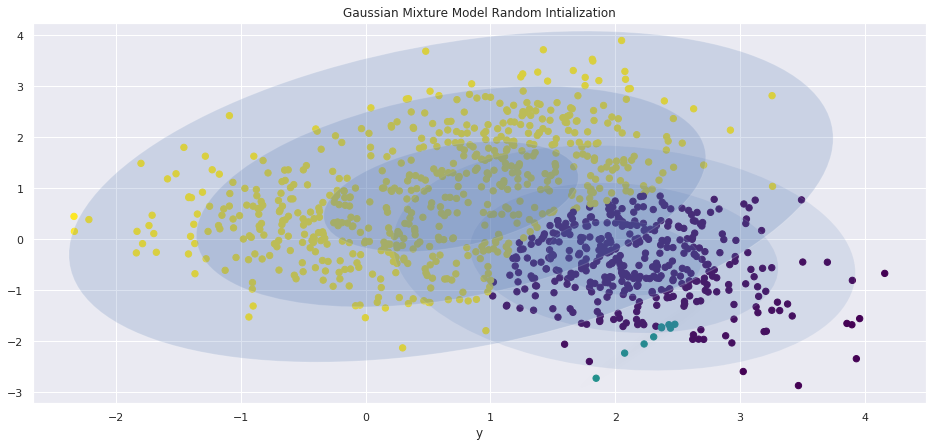

In [40]:

w_init,μ_init,Σ_init=Random_init(X, K=3)

w_pred, μ_pred, Σ_pred, labels_predicted,log_likelihood_hist = GMM(X,40,w_init, μ_init, Σ_init)

plt.figure(figsize=(16,7))
plt.scatter(X[:, 0], X[:, 1], c=labels_predicted, s=40, cmap='viridis')
plt.xlabel("x")
plt.xlabel("y")
plt.title("Gaussian Mixture Model Random Intialization")
w_factor = 0.2 / w_pred.max()
for pos, covar, w in zip(μ_pred, Σ_pred, w_pred):
   draw_ellipse(pos, covar, alpha=w * w_factor)


EM algorithm has well-documented drawbacks,its solution could be highly dependent from its initial position and it may fail as a result of degeneracie.

Starting  with  some  initial mixture model, the EM algorithm alternates between comput-ing  a  lower  bound  of  the  log-likelihood  and  improving  the current  model  with  respect  to  this  lower  bound.  The  algo-rithm converges to a certain stationary point of the likelihood function.  Unfortunately,  the  likelihood  function  is  generally nonconvex, possessing many stationary points, including small local maxima, and even worse, local minima and saddle points. Moreover, the convergence of the EM algorithm to  either  type  of  point  highly  depends  on  the  chosen  initial model.

### References:

1. [Simple Methods for Initializing the EM Algorithmfor Gaussian Mixture Models](https://pdfs.semanticscholar.org/7d4a/2da54c78cf62a2e8ea60e18cef35ab0d5e25.pdf)

